<a href="https://colab.research.google.com/github/PriyankaMangiau/Alzheimer-Models/blob/main/ModelTraining3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/alzheimers_disease_data.csv")

In [7]:
# Data Preprocessing
# Drop irrelevant columns
columns_to_drop = ['PatientID', 'DoctorInCharge']
dataset = dataset.drop(columns=columns_to_drop, errors='ignore')

In [8]:
# Check for missing values and handle them
if dataset.isnull().sum().any():
    dataset = dataset.fillna(dataset.median())  # Replace missing values with median

In [9]:
# Separate features and target
X = dataset.drop('Diagnosis', axis=1)
y = dataset['Diagnosis']

In [10]:
# Encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Convert target to categorical
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [14]:
# Build the CNN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {eval_results[1]:.2f}")

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5409 - loss: 0.9707 - val_accuracy: 0.7442 - val_loss: 0.5784
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.5929 - val_accuracy: 0.7703 - val_loss: 0.5176
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7722 - loss: 0.5172 - val_accuracy: 0.7965 - val_loss: 0.4757
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4473 - val_accuracy: 0.8140 - val_loss: 0.4600
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8112 - loss: 0.4243 - val_accuracy: 0.8169 - val_loss: 0.4492
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 0.3754 - val_accuracy: 0.8256 - val_loss: 0.4390
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3633 - val_accuracy: 0.8314 - val_loss: 0.4307
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8575 - loss: 0.3398 - val_accuracy: 0.8343 - val_loss:

In [17]:
# Generate Predictions
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [18]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       277
           1       0.77      0.75      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.82       430
weighted avg       0.83      0.83      0.83       430



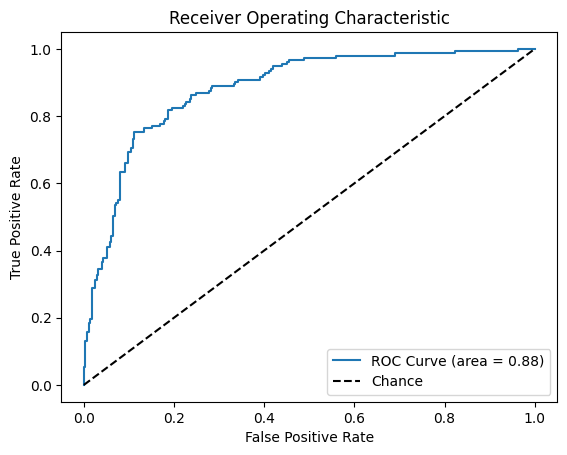

In [19]:
# Generate ROC Curve for the positive class
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

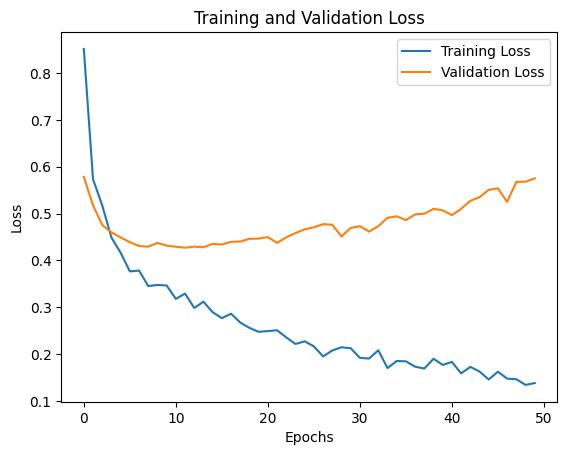

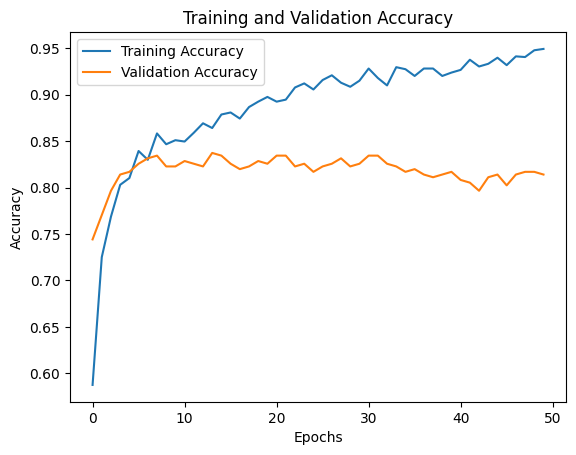

In [20]:
# Plot training loss and accuracy
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
from google.colab import drive

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/alzheimers_disease_data.csv")

# Data Preprocessing
columns_to_drop = ['PatientID', 'DoctorInCharge']
dataset = dataset.drop(columns=columns_to_drop, errors='ignore')

if dataset.isnull().sum().any():
    dataset = dataset.fillna(dataset.median())  # Replace missing values with median

# Separate features and target
X = dataset.drop('Diagnosis', axis=1)
y = dataset['Diagnosis']

# Encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target to categorical
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the CNN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (NN): {eval_results[1]:.2f}")

# Generate Predictions for Neural Network
y_prob_nn = model.predict(X_test)
y_pred_nn = np.argmax(y_prob_nn, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report for Neural Network:")
print(classification_report(y_test_labels, y_pred_nn))

# ROC Curve for Neural Network
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test[:, 1], y_prob_nn[:, 1])
roc_auc_nn = roc_auc_score(y_test, y_prob_nn, multi_class='ovr')

# Plotly ROC Curve for Neural Network
roc_curve_nn = go.Figure()
roc_curve_nn.add_trace(go.Scatter(x=fpr_nn, y=tpr_nn, mode='lines', name=f'ROC Curve (NN) (area = {roc_auc_nn:.2f})'))
roc_curve_nn.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance', line=dict(dash='dash')))
roc_curve_nn.update_layout(title='Receiver Operating Characteristic (NN)',
                           xaxis_title='False Positive Rate',
                           yaxis_title='True Positive Rate',
                           showlegend=True)
roc_curve_nn.show()

# Plot training loss and accuracy using Plotly
loss_trace = go.Figure()
loss_trace.add_trace(go.Scatter(x=np.arange(len(history.history['loss'])), y=history.history['loss'], mode='lines', name='Training Loss'))
loss_trace.add_trace(go.Scatter(x=np.arange(len(history.history['val_loss'])), y=history.history['val_loss'], mode='lines', name='Validation Loss'))
loss_trace.update_layout(title='Training and Validation Loss', xaxis_title='Epochs', yaxis_title='Loss', showlegend=True)
loss_trace.show()

acc_trace = go.Figure()
acc_trace.add_trace(go.Scatter(x=np.arange(len(history.history['accuracy'])), y=history.history['accuracy'], mode='lines', name='Training Accuracy'))
acc_trace.add_trace(go.Scatter(x=np.arange(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
acc_trace.update_layout(title='Training and Validation Accuracy', xaxis_title='Epochs', yaxis_title='Accuracy', showlegend=True)
acc_trace.show()

# Now let’s apply other classifiers

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, np.argmax(y_train, axis=1))  # Use np.argmax to get original labels
y_pred_rf = rf_model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)  # Convert test labels to original form
print("Random Forest Classification Report:")
print(classification_report(y_test_labels, y_pred_rf))

# SVM Classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, np.argmax(y_train, axis=1))
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test_labels, y_pred_svm))

# K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, np.argmax(y_train, axis=1))
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test_labels, y_pred_knn))


# ROC Curves for other classifiers
# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test[:, 1], y_prob_rf[:, 1])
roc_auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')

# Plotly ROC Curve for Random Forest
roc_curve_rf = go.Figure()
roc_curve_rf.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name=f'ROC Curve (RF) (area = {roc_auc_rf:.2f})'))
roc_curve_rf.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance', line=dict(dash='dash')))
roc_curve_rf.update_layout(title='Receiver Operating Characteristic (Random Forest)',
                           xaxis_title='False Positive Rate',
                           yaxis_title='True Positive Rate',
                           showlegend=True)
roc_curve_rf.show()

# SVM ROC Curve
y_prob_svm = svm_model.predict_proba(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test[:, 1], y_prob_svm[:, 1])
roc_auc_svm = roc_auc_score(y_test, y_prob_svm, multi_class='ovr')

# Plotly ROC Curve for SVM
roc_curve_svm = go.Figure()
roc_curve_svm.add_trace(go.Scatter(x=fpr_svm, y=tpr_svm, mode='lines', name=f'ROC Curve (SVM) (area = {roc_auc_svm:.2f})'))
roc_curve_svm.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance', line=dict(dash='dash')))
roc_curve_svm.update_layout(title='Receiver Operating Characteristic (SVM)',
                            xaxis_title='False Positive Rate',
                            yaxis_title='True Positive Rate',
                            showlegend=True)
roc_curve_svm.show()

# KNN ROC Curve
y_prob_knn = knn_model.predict_proba(X_test)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test[:, 1], y_prob_knn[:, 1])
roc_auc_knn = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')

# Plotly ROC Curve for KNN
roc_curve_knn = go.Figure()
roc_curve_knn.add_trace(go.Scatter(x=fpr_knn, y=tpr_knn, mode='lines', name=f'ROC Curve (KNN) (area = {roc_auc_knn:.2f})'))
roc_curve_knn.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance', line=dict(dash='dash')))
roc_curve_knn.update_layout(title='Receiver Operating Characteristic (KNN)',
                            xaxis_title='False Positive Rate',
                            yaxis_title='True Positive Rate',
                            showlegend=True)
roc_curve_knn.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.5513 - loss: 1.0015 - val_accuracy: 0.7529 - val_loss: 0.5664
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7266 - loss: 0.5817 - val_accuracy: 0.7645 - val_loss: 0.5064
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7912 - loss: 0.4679 - val_accuracy: 0.7849 - val_loss: 0.4773
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8123 - loss: 0.4486 - val_accuracy: 0.8023 - val_loss: 0.4527
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8059 - loss: 0.4231 - val_accuracy: 0.8140 - val_loss: 0.4432
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8255 - loss: 0.3917 - val_accuracy: 0.8052 - val_loss: 0.4460
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8283 - loss: 0.3934 - val_accuracy: 0.8052 - val_loss: 0.4520
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 0.3825 - val_accuracy: 0.8052 - val_l

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.80      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       277
           1       0.64      0.47      0.54       153

    accuracy                           0.72       430
   macro avg       0.69      0.66    